'%matplotlib inline' will print rich content inline.
Let's import pandas and matplotlib's pyplot module. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

We can load a csv file into a padnas DataFrame with `read_csv()` method. You can specify the location of the index with `index_col` parameter. In L2, we changed the data type of date by using `to_datetime()` method. But there is an another way. You can also specify the index number of the date column with `parse_dates` parameter. In our case, it will be the index number `0`. Now, pandas will interpret the date infromation as datetime object rather than just plain string.

In [2]:
df = pd.read_csv('../Data/DIS.csv', index_col='Date', parse_dates=[0])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.092908,0.096026,0.092908,0.092908,0.035517,817400
1962-01-03,0.092908,0.094467,0.092908,0.094155,0.035994,778500
1962-01-04,0.094155,0.094467,0.093532,0.094155,0.035994,934200
1962-01-05,0.094155,0.094779,0.093844,0.094467,0.036113,934200
1962-01-08,0.094467,0.095714,0.092285,0.094155,0.035994,1245600
...,...,...,...,...,...,...
2019-12-23,145.910004,146.330002,144.330002,144.679993,144.679993,9314000
2019-12-24,144.580002,145.429993,144.449997,145.289993,145.289993,3508500
2019-12-26,145.399994,145.860001,145.169998,145.699997,145.699997,4422000


You can get percentage change between the current and a prior data with `pct_change()` method in pandas. We can use this to calculate daily return of the stock.

In [3]:
df['daily_return'] = df['Adj Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
1962-01-02,0.092908,0.096026,0.092908,0.092908,0.035517,817400,NaN
1962-01-03,0.092908,0.094467,0.092908,0.094155,0.035994,778500,0.013430
1962-01-04,0.094155,0.094467,0.093532,0.094155,0.035994,934200,0.000000
1962-01-05,0.094155,0.094779,0.093844,0.094467,0.036113,934200,0.003306
1962-01-08,0.094467,0.095714,0.092285,0.094155,0.035994,1245600,-0.003295
...,...,...,...,...,...,...,...
2019-12-23,145.910004,146.330002,144.330002,144.679993,144.679993,9314000,-0.014978
2019-12-24,144.580002,145.429993,144.449997,145.289993,145.289993,3508500,0.004216
2019-12-26,145.399994,145.860001,145.169998,145.699997,145.699997,4422000,0.002822


You can use `cumprod()` method to get cumulative product over a DataFrame column.

In [4]:
df['cumulative_return'] = (df['daily_return'] + 1).cumprod() - 1
df

,Open,High,Low,Close,Adj Close,Volume,daily_return,cumulative_return
Date,,,,,,,,
1962-01-02,0.092908,0.096026,0.092908,0.092908,0.035517,817400,NaN,NaN
1962-01-03,0.092908,0.094467,0.092908,0.094155,0.035994,778500,0.013430,0.013430
1962-01-04,0.094155,0.094467,0.093532,0.094155,0.035994,934200,0.000000,0.013430
1962-01-05,0.094155,0.094779,0.093844,0.094467,0.036113,934200,0.003306,0.016781
1962-01-08,0.094467,0.095714,0.092285,0.094155,0.035994,1245600,-0.003295,0.013430
...,...,...,...,...,...,...,...,...
2019-12-23,145.910004,146.330002,144.330002,144.679993,144.679993,9314000,-0.014978,4072.542050
2019-12-24,144.580002,145.429993,144.449997,145.289993,145.289993,3508500,0.004216,4089.716924
2019-12-26,145.399994,145.860001,145.169998,145.699997,145.699997,4422000,0.002822,4101.260805


We can draw a figure from a DataFrame with matplotlib and pandas. Pandas has built-in methods that help plot easily. We're going to use `plot()` method from pandas. You can change the size of a figure with `figsize` parameter with a tuple (width, height) in inches as an argument.

'set_xlabel' and 'set_ylabel' are the functions to decide the names of axis.

Text(0, 0.5, 'Cumulative Return')

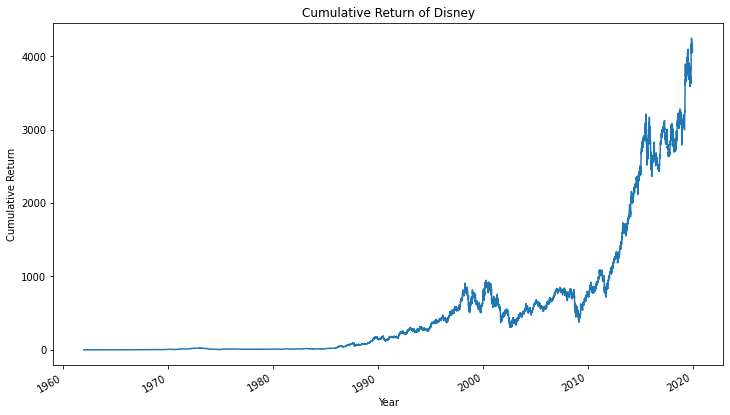

In [5]:
#draw cumulative return
ax = df['cumulative_return'].plot(figsize = (12, 7), title = 'Cumulative Return of Disney')
ax.set_xlabel("Year")
ax.set_ylabel('Cumulative Return')


Let's calculatate annualized return.

In [6]:
df['cumulative_return'][-1] ** (1/58) - 1

0.15396279071021124

There are mulitple ways to select data from DataFrame. The `.loc` attribute selects data by index label. It is similar to how Python dictionaries work. You can use Python's slice notation `:` to select many values.

`.loc` can be used when you create Boolean data to get the data. We will encount more examples later. 

In [6]:
# Data after 2000-01-01
disney_filtered = df.loc["2000-01-01":]
disney_filtered

,Open,High,Low,Close,Adj Close,Volume,daily_return,cumulative_return
Date,,,,,,,,
2000-01-03,28.855125,29.533344,28.361876,29.471687,23.093716,8402200,0.021367,649.215840
2000-01-04,29.594999,31.444687,29.594999,31.198063,24.446487,16051100,0.058577,687.303826
2000-01-05,31.198063,32.677811,31.198063,32.492844,25.461063,19823800,0.041502,715.869753
2000-01-06,32.492844,32.677811,31.198063,31.198063,24.446487,7903100,-0.039848,687.303826
2000-01-07,31.198063,31.691313,30.396532,30.704813,24.059982,6773500,-0.015810,676.421573
...,...,...,...,...,...,...,...,...
2019-12-23,145.910004,146.330002,144.330002,144.679993,144.679993,9314000,-0.014978,4072.542050
2019-12-24,144.580002,145.429993,144.449997,145.289993,145.289993,3508500,0.004216,4089.716924
2019-12-26,145.399994,145.860001,145.169998,145.699997,145.699997,4422000,0.002822,4101.260805
